In [13]:
from operator import sub, add, mul, truediv
from cytoolz import pipe
from cytoolz.curried import map, flip
from functools import partial
from statistics import mean, stdev, pstdev
import numpy as np
import pandas as pd


def bolden(string) -> str:
    return f'\033[1m {string} \033[0m'

# __Q3.6__ Use these methods to normalize the following group of data:

In [28]:
# data = [200, 300, 400, 600, 1000]
data = [13, 15,16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]

## __a. min-max normalization__ by setting `min = 0` and `max = 1`

In [5]:
min_data = min(data)
max_data = max(data)

print(f'Min value of data is {bolden(min_data)} while max value of data is {bolden(max_data)}')

Min value of data is  13  while max value of data is  70 


Let's define some helper functions to compute the min-max normalization.

In [6]:
sub_old_min = partial(flip(sub), min_data)
div_by_max_sub_min = partial(flip(truediv), sub(max_data,min_data))
round_by_3 = partial(flip(round), 3)

following the formula for min-max normalization:
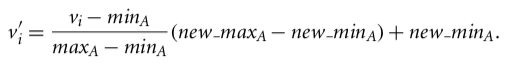

we have the function `normalize_minmax`:

In [7]:
def normalize_minmax(data, new_min=0, new_max=1):
    mul_by_new_minmax = partial(mul, sub(new_max, new_min))
    add_new_min = partial(flip(add), new_min)
    return pipe(data, 
                map(sub_old_min), 
                map(mul_by_new_minmax), 
                map(div_by_max_sub_min), 
                map(add_new_min), 
                map(round_by_3)
    )

In [41]:
print(f'Orginal data: {data}')
print(f'[0,1] normalized data: {list(normalize_minmax(data))}')
norm_data = list(normalize_minmax(data))
print(data[17])
print(norm_data[17])

Orginal data: [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]
[0,1] normalized data: [0.0, 0.035, 0.053, 0.053, 0.105, 0.123, 0.123, 0.14, 0.158, 0.158, 0.211, 0.211, 0.211, 0.211, 0.298, 0.351, 0.351, 0.386, 0.386, 0.386, 0.386, 0.404, 0.474, 0.561, 0.579, 0.684, 1.0]
35
0.386


## __b. z-score normalization__.

In [37]:
mean_data = round(mean(data), 2)
# stdev_data = round(pstdev(data), 2)
stdev_data = 12.94

print(f'Mean of data is {bolden(mean_data)} and standard deviation of data is {bolden(stdev_data)}')

Mean of data is  29.96  and standard deviation of data is  12.94 


In [38]:
sub_mean = partial(flip(sub), mean_data)
div_by_stdev = partial(flip(truediv), stdev_data)

following the formula for z-score:
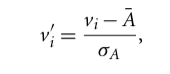

we have the function `normalize_zscore`:

In [39]:
def normalize_zscore(data):
    return pipe(data, map(sub_mean), map(div_by_stdev), map(round_by_3))

In [40]:
print(f'Orginal data: {data}')
print(f'z-score normalized data: {list(normalize_zscore(data))}')
norm_data = list(normalize_zscore(data))
print(data[17])
print(norm_data[17])

Orginal data: [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]
z-score normalized data: [-1.311, -1.156, -1.079, -1.079, -0.847, -0.77, -0.77, -0.692, -0.615, -0.615, -0.383, -0.383, -0.383, -0.383, 0.003, 0.235, 0.235, 0.389, 0.389, 0.389, 0.389, 0.467, 0.776, 1.162, 1.24, 1.703, 3.094]
35
0.389


In [47]:
mean(c(13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70))

29.962962962962962

## __c. z-score normalization using the mean absolute deviation instead of standard deviation.__

Instead of using standard deviation we will have to use mean absolute deviation, which is computed using the following formula:
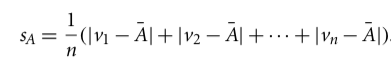

the above formula is computed using the function `mad`

In [22]:
def mad(data, axis=None):
    return np.mean(np.absolute(data - np.mean(data, axis)), axis)

In [23]:
mad_data = mad(data)

print(f'Mean absolute deviation of data is {bolden(mad_data)}')

Mean absolute deviation of data is  240.0 


In [24]:
div_by_mad = partial(flip(truediv), mad_data)

following the formula for z-score normalization using the mean absolute deviation: 
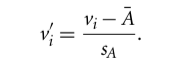

we have the function `normalize_zscore_mad`:

In [107]:
def normalize_zscore_mad(data):
    return pipe(data, map(sub_mean), map(div_by_mad), map(round_by_3))

In [108]:
print(f'Orginal data: {data}')
print(f'z-score normalized data using `mad`: {list(normalize_zscore_mad(data))}')

Orginal data: [200, 300, 400, 600, 1000]
z-score normalized data using `mad`: [-1.25, -0.833, -0.417, 0.417, 2.083]


## __d. normalization by decimal scaling.__

In [42]:
print(f'Max value of the data is {bolden(max_data)}')

Max value of the data is  70 


Since the max absolute value of the data is 1000, to normalize by decimal scaling, we therefore divide each value in the data by 1000 (i.e `j = 3`).

Following the formula for decimal scaling:
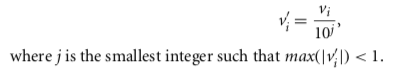

we have the function `normalize_dec_scale`:

In [44]:
def normalize_dec_scale(data, j):
    divide_by_10j = partial(flip(truediv), np.power(10, j))
    return pipe(data, map(divide_by_10j))

In [46]:
print(f'Orginal data: {data}')
print(f'Normalized by decimal scaling: {list(normalize_dec_scale(data, 2))}')
norm_data = list(normalize_dec_scale(data, 2))
print(data[17])
print(norm_data[17])

Orginal data: [13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70]
Normalized by decimal scaling: [0.13, 0.15, 0.16, 0.16, 0.19, 0.2, 0.2, 0.21, 0.22, 0.22, 0.25, 0.25, 0.25, 0.25, 0.3, 0.33, 0.33, 0.35, 0.35, 0.35, 0.35, 0.36, 0.4, 0.45, 0.46, 0.52, 0.7]
35
0.35
